In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# Load the dataset
data = pd.read_excel("C:\\Users\\ll010\\OneDrive\\Documents\\Dataset_assigment.xlsx")

In [ ]:
# Split the dataset into train and test sets
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train_data, test_data = data.iloc[0:train_size], data.iloc[train_size:len(data)]

In [ ]:
# Normalize the data
mean = train_data['Mbps'].mean()
std = train_data['Mbps'].std()
train_data.loc[:, 'Normalized Mbps'] = (train_data['Mbps'] - mean) / std
test_data.loc[:, 'Normalized Mbps'] = (test_data['Mbps'] - mean) / std

In [ ]:
# Define the function to create the dataset
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
# Define the number of time steps
time_steps = 4

In [ ]:
# Create the train and test datasets
X_train, y_train = create_dataset(train_data[['Normalized Mbps']], train_data['Normalized Mbps'], time_steps)
X_test, y_test = create_dataset(test_data[['Normalized Mbps']], test_data['Normalized Mbps'], time_steps)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50

81/81 [==============================] - 17s 49ms/step - loss: 0.2075 - val_loss: 0.0951
Epoch 2/50
81/81 [==============================] - 1s 13ms/step - loss: 0.0718 - val_loss: 0.0839
Epoch 3/50
81/81 [==============================] - 1s 13ms/step - loss: 0.0635 - val_loss: 0.0753
Epoch 4/50
81/81 [==============================] - 1s 12ms/step - loss: 0.0535 - val_loss: 0.0630
Epoch 5/50
81/81 [==============================] - 1s 12ms/step - loss: 0.0403 - val_loss: 0.0426
Epoch 6/50
81/81 [==============================] - 1s 12ms/step - loss: 0.0276 - val_loss: 0.0309
Epoch 7/50
81/81 [==============================] - 1s 12ms/step - loss: 0.0219 - val_loss: 0.0284
Epoch 8/50
81/81 [==============================] - 1s 13ms/step - loss: 0.0165 - val_loss: 0.0183
Epoch 9/50
81/81 [==============================] - 1s 12ms/step - loss: 0.0131 - val_loss: 0.0157
Epoch 10/50
81/81 [==============================] - 1s 12ms/step - loss: 0.0122 - val_loss: 0.0145
Epoch 1

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

26/26 [==============================] - 3s 8ms/step


In [ ]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 0.05602081302863729
MSE: 0.009384401009539115
RMSE: 0.09687311809547122


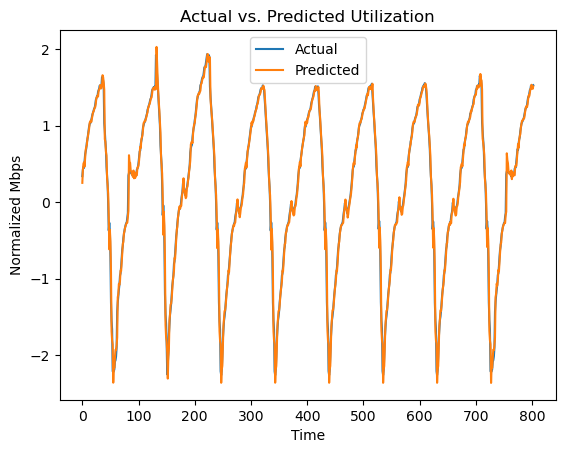

In [ ]:
# Plot actual vs. predicted utilization
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Normalized Mbps')
plt.title('Actual vs. Predicted Utilization')
plt.legend()
plt.savefig('utilization_prediction.pdf')
plt.show()